<a href="https://colab.research.google.com/github/sheida78/CS-SBU-eAdvancedAlgorithms-MSc-2023/blob/main/Copy_of_Copy_of_Copy_of_%DA%A9%D8%A7%D8%B1%D8%AA_%D8%A7%D8%B9%D8%AA%D8%A8%D8%A7%D8%B1%DB%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# پروژه ی یادگیری بدون نظارت تقسیم بندی مشتریان بانک آل لایف



در این پروزه یادگیری بدون ناظر ما از داده های کارت اعتباری مشتریان استفاده خواهیم کرد


بانک آل لایف می خواهد در سال مالی آینده بر پایگاه  کارت اعتباری مشتریان خود تمرکز کند. تیم تحقیقات بازاریابی به آنها توصیه کرده است که نفوذ در بازار را می توان بهبود بخشید. بر اساس این ورودی، تیم بازاریابی پیشنهاد می کند که کمپین های شخصی سازی شده را برای هدف قرار دادن مشتریان جدید و همچنین فروش به مشتریان فعلی اجرا کند.

دیدگاه دیگری از تحقیقات بازار این بود که مشتریان خدمات پشتیبانی بانک را ضعیف می دانند. بر این اساس، تیم عملیات می‌خواهد مدل ارائه خدمات را ارتقا دهد تا اطمینان حاصل شود که سؤالات مشتریان سریع‌تر حل می‌شوند. رئیس بازاریابی و رئیس تحویل، هر دو تصمیم می‌گیرند برای کمک با تیم علم داده تماس بگیرند.

# هدف

شناسایی بخش‌های مختلف در پایگاه مشتری ، با در نظر گرفتن الگوهای مخارج آنها و همچنین تعاملات گذشته با مشتریان بانک


# در مورد داده ها

داده‌های مشتریان بانک با محدودیت اعتبار، تعداد کل کارت‌های اعتباری مشتری و کانال‌های مختلفی که مشتری از طریق آنها برای هرگونه سؤال با بانک تماس گرفته است، در دسترس است. این کانال های مختلف شامل مراجعه به بانک، آنلاین و از طریق مرکز تماس است.


*   Sl-no :شماره سریال مشتری
*   Customer-key:احراز هویت مشتری

*   Avg-Credit-Limit:حد متوسط اعتبار
*   Total-Credit-Cart:تعداد کل کارت های اعتباری

*   Total_visits_bank:مجموع بازدید های بانکی
*   Total_visits_online:مجموع بازدید های آنلاین

*   Total_calls_made :مجموع تماس های انجام شده

### فراخوانی کتابخانه ها و نمای کلی  مجموعه ی داده ها

In [47]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


در این قسمت کتابخانه های مورد نیاز را فراخوانی می کنیم

 اگر کتابخانه  scikit-learn را نصب نکرده اید، لطفا کد زیر را برای نصب کتابخانه اجرا کنید:

!pip install scikit-learn-extra


In [48]:
# فرخوانی کتابخانه های ضروری
import pandas as pd

import numpy as np

import matplotlib.pylab as plt

import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# Importing clustering algorithms
from sklearn.cluster import KMeans

from sklearn.mixture import GaussianMixture

from sklearn_extra.cluster import KMedoids

import warnings
warnings.filterwarnings("ignore")

# باز کردن مجموعه داده ها

In [49]:
data = pd.read_excel('/content/gdrive/MyDrive/credit-card.xlsx')
data.head()


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


# بررسی اطلاعات مجموعه داده ها

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


 ششصد و شصت مشاهده و 7 ستون در مجموعه داده وجود دارد.
همه ستون ها دارای 660 مقدار غیر تهی هستند، یعنی هیچ مقدار گم شده ای وجود ندارد.
تمام ستون ها از نوع داده عدد صحیح هستند.

In [51]:
data.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

کلید مشتری، یک شناسه است که مقادیر تکراری دارد. قبل از اعمال هر الگوریتمی، کلیدهای مشتری تکراری را درمان می کنیم.

# پیش پردازش داده ها و تجزیه و تحلیل داده های اکتشافی

## بررسی کلید های تکراری مشتری
کلید های مشتری دارای مقادیر تکراری هستند و می توانیم ردیف تکراری را پیدا کنیم

# سوال1
کلید های تکراری مشتری را در سطر ها حدف کنید 2نمره



In [ ]:
# There are some duplicates in the column 'Customer Key'. Let us explore
duplicate_keys = data['Customer Key'].__________

data[duplicate_keys]

توجه: ما هیچ فرضی در مورد اینکه کدام ردیف با کلیدهای تکراری باید حذف شود، نداریم. به عنوان مثال، اگر ردیف 2 و ردیف 10 دارای کلیدهای مشتری تکراری باشند، هر یک از دو ردیف را می توان حذف کرد.

In [ ]:
# let's drop duplicate keys

data = ____________

 پنج کلید مشتری تکراری وجود دارد. ما می توانیم این مشاهدات را کنار بگذاریم.

## حذف کردن ستون ها

ما چند بررسی اساسی انجام داده ایم. حالا متغیرهایی را که برای تجزیه و تحلیل ما مورد نیاز نیستند، کنار می گذاریم.

In [53]:
# کلیدهای تکراری را حذف  می کنیم
data.drop(columns = ['Sl_No', 'Customer Key'], inplace = True)

# بررسی ردیف های تکراری

اکنون، که ستون‌های غیر ضروری را حذف کرده‌ایم، می‌توانیم دوباره وجود موارد تکراری را بررسی کنیم. تکراری به معنای مشتریانی با ویژگی های یکسان است.

In [54]:
data[data.duplicated()]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
162,8000,2,0,3,4
175,6000,1,0,2,5
215,8000,4,0,4,7
295,10000,6,4,2,3
324,9000,4,5,0,4
361,18000,6,3,1,4
378,12000,6,5,2,1
385,8000,7,4,2,0
395,5000,4,5,0,1
455,47000,6,2,0,4


  یازده ردیف تکراری وجود دارد. ما می توانیم این ردیف های تکراری را از داده ها حذف کنیم.

In [55]:
data = data[~data.duplicated()]


In [56]:
data.shape

(649, 5)

پس از حذف کلیدهای تکراری، ردیف های تکراری و حذف ستون های غیر ضروری، 644 مشاهده منحصر به فرد و 5 ستون در داده های ما وجود دارد.

# خلاصه آمار

# سوال 2
 مشاهدات خود را در مورد آمار خلاصه داده ها بنویسید (1 نمره)

In [57]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,649.0,34878.274268,37813.736638,3000.0,11000.0,18000.0,49000.0,200000.0
Total_Credit_Cards,649.0,4.708783,2.173763,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,649.0,2.397535,1.625148,0.0,1.0,2.0,4.0,5.0
Total_visits_online,649.0,2.624037,2.952888,0.0,1.0,2.0,4.0,15.0
Total_calls_made,649.0,3.590139,2.877911,0.0,1.0,3.0,5.0,10.0


 بیایید با کاوش هر متغیری که در دست داریم، پیش برویم

# سوال 3
 توزیع و نقاط پرت را برای هر متغیر در داده ها بررسی کنید.

توزیع همه متغییر ها را حساب کنید . 2نمره

نقاط پرت را برای تمام متغییر ها حساب کنید  2 نمره

مشاهدات خود را بنویسید 1 نمره

کد زیر را با پر کردن جاهای خالی، قبل از اجرای سلول تکمیل کنید تا از هر گونه خطایی جلوگیری شود

In [ ]:
for col in data.columns:

    print(col)

    print('Skew :', round(data[col].skew(), 2))

    plt.figure(figsize = (15, 4))

    plt.subplot(1, 2, 1)

    data[col].______________

    plt.ylabel('count')

    plt.subplot(1, 2, 2)

    sns.boxplot(x = ___________)

    plt.show()

# بررسی همبستگی

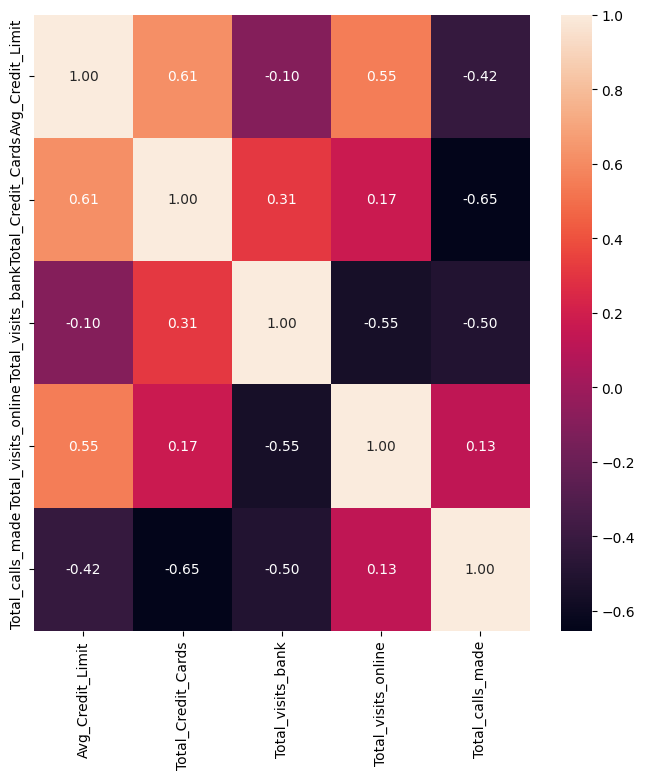

In [59]:
plt.figure(figsize = (8, 8))

sns.heatmap(data.corr(), annot = True, fmt = '0.2f')

plt.show()

# مشاهدات


- Avg_Credit_Limit با Total_Credit_Cards و Total_visits_online همبستگی مثبت دارد که منطقی است.
- میانگین_ اعتبار_محدودیت با Total_calls_made و Total_visits_bank همبستگی منفی دارد.
- Total_visits_bank، Total_visits_online، Total_calls_made همبستگی منفی دارند که به این معنی است که اکثر مشتریان تنها از یکی از این کانال ها برای تماس با بانک استفاده می کنند.

# مقیاس سازی داده ها

In [60]:
# داده ها را استاندارد کنید تا میانگین ~ 0 و واریانس 1 داشته باشد
scaler = StandardScaler()
data_scaled = StandardScaler().fit_transform(data)

# استفاده از پی سی آی  روی داده های مقیاس شده

In [61]:
from sklearn.decomposition import PCA


n = data.shape[1]

# Create a PCA instance: pca
pca = PCA(n_components=n)

principal_components = pca.fit_transform(data_scaled)
# Save components to a DataFrame

data_pca = pd.DataFrame(principal_components, columns = data.columns)

In [62]:
# ایجاد کپی از داده ها برای ذخیره برچسب ها از هر الگوریتم

data_copy = data_pca.copy(deep = True)

# k-means

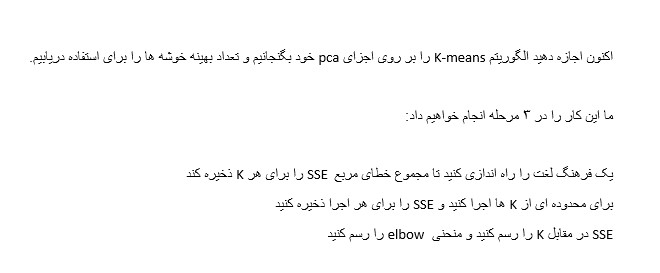

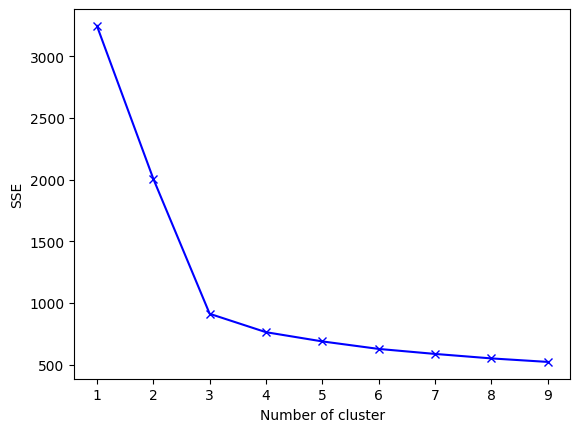

In [63]:
#stp1
sse = {}

# step 2 - iterate for a range of Ks and fit the pca components to the algorithm.
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, max_iter = 1000, random_state = 1).fit(data_pca)
    sse[k] = kmeans.inertia_     # Use inertia attribute from the clustering object and store the inertia value for that K

# step 3
plt.figure()

plt.plot(list(sse.keys()), list(sse.values()), 'bx-')

plt.xlabel("Number of cluster")

plt.ylabel("SSE")

plt.show()

# سوال 4

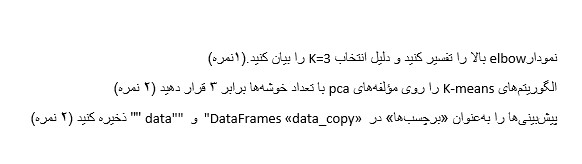

In [ ]:
kmeans = _______________                      # Apply the K-Means algorithm

__________________                            # Fit the kmeans function on the pca components

# افزودن برچسب های پیش بینی شده به داده های اصلی و داده های کپی شده
data_copy['Labels'] = ___________     # Save the predictions on the pca components from K-Means
data['Labels'] = _______________             # Save the predictions on the pca components from K-Means

حالا برچسب هایی  را با الگوریتم تولید کرده ایم .حال، اجازه دهید به ویژگی های مختلف بر اساس برچسب ها نگاه کنیم.

# سوال 5
 نمایه های خوشه را با استفاده از آمار خلاصه زیر و نمودارهای جعبه برای  
 هر برچسب ایجاد کنید 6نمره

In [64]:
# تعداد مشاهدات در هر خوشه
data.Labels.value_counts()

AttributeError: ignored

In [ ]:
# محاسبه خلاصه آمار داده های اصلی برای هر برچسب
mean = data.groupby('Labels').mean()

median = data.groupby('Labels').median()

df_kmeans = pd.concat([mean, median], axis = 0)

df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_kmeans.T

In [ ]:
# Visualizing different features w.r.t K-means labels
data_copy.boxplot(by = 'Labels', layout = (1, 5), figsize = (20, 7))

plt.show()

# مدل مخلوط گاوسی

حال بیایید با استفاده از مدل مخلوط گاوسی خوشه هایی ایجاد کنیم

# سوال 6

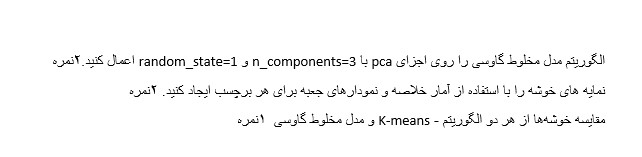

In [ ]:
gmm = ______________     # Apply the Gaussian Mixture algorithm on the pca components with n_components=3 and random_state=1

gmm.fit(____________)    # مدل را روی اجزای pca قرار دهید

data_copy['GmmLabels'] = gmm.predict(data_pca)

data['GmmLabels'] = gmm.predict(data_pca)

In [ ]:
#تعداد مشاهدات در هر خوشه
data.GmmLabels.value_counts()

In [ ]:

# محاسبه آمار خلاصه داده های اصلی برای هر برچسب
original_features = ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made"]


mean = data.groupby('GmmLabels').mean()

median = data.groupby('GmmLabels').median()

df_gmm = pd.concat([mean, median], axis = 0)

df_gmm.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_gmm[original_features].T

In [ ]:

# Plotting boxplots with the new GMM based labels
features_with_lables = ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made", "GmmLabels"]

data_copy[features_with_lables].boxplot(by = 'GmmLabels', layout = (1, 5),figsize = (20, 7))

plt.show()

# kmedoids

# سوال 7
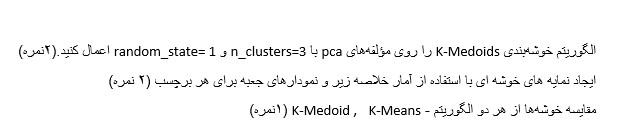

In [ ]:
kmedo = _______________      # Apply the K-Medoids algorithm on the pca components with n_components=3 and random_state=1ed


kmedo.fit(____________)      # Fit the model on the pca components

data_copy['kmedoLabels'] = kmedo.predict(data_pca)

data['kmedoLabels'] = kmedo.predict(data_pca)

In [ ]:
# تعداد مشاهدات در هر خوشه
data.kmedoLabels.value_counts()

In [ ]:
# محاسبه خلاصه آمار داده های اصلی برای هر برچسب

mean = data.groupby('kmedoLabels').mean()

median = data.groupby('kmedoLabels').median()

df_kmedoids = pd.concat([mean, median], axis = 0)

df_kmedoids.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_kmedoids[original_features].T

In [ ]:
# Plotting boxplots with the new K-Medoids based labels
features_with_lables = ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made", "kmedoLabels"]
data_copy[features_with_lables].boxplot(by = 'kmedoLabels', layout = (1, 5), figsize = (20, 7))
plt.show()

پروفایل های خوشه:____

خوشه های K-Means و K-Medoids را با هم مقایسه کنیم

In [ ]:
comparison = pd.concat([df_kmedoids, df_kmeans], axis = 1)[original_features]
comparison